In [22]:
import pickle
import math
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt

#### Part 1: Expected Signifcance
The purpose of this lab is to search for the Higgs boson in simulated LHC data, and then use machine learning to optimize event selections to enhance discovery sensitivity. The ideal event selections will be used on selected psuedo-experimental data.

In [32]:
qcd_file = open("qcd_100000_pt_1000_1200.pkl", 'rb')
qcd_d = pickle.load(qcd_file)

higgs_file = open("higgs_100000_pt_1000_1200.pkl", 'rb')
higgs_d = pickle.load(higgs_file)

high_lumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
low_lumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

features = [key for key in qcd_d.keys()]
print(features)

['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']


According to the Standard Model, the Higgs field interacts with particles to give them mass. The Higgs boson is the quantum particle which interacts with the Higgs field. Using this understanding that mass is a defining feature of the Higgs particle, we can examine the mass of a a jet in order to discriminate between jets containing Higgs particles and those containing a variety of other quantum chromodynamic (QCD) particles.

The goal of this analysis is to confirm the existence of the Higgs boson with maximum confidence, as direct observation of the particle is obscured by QCD noise.

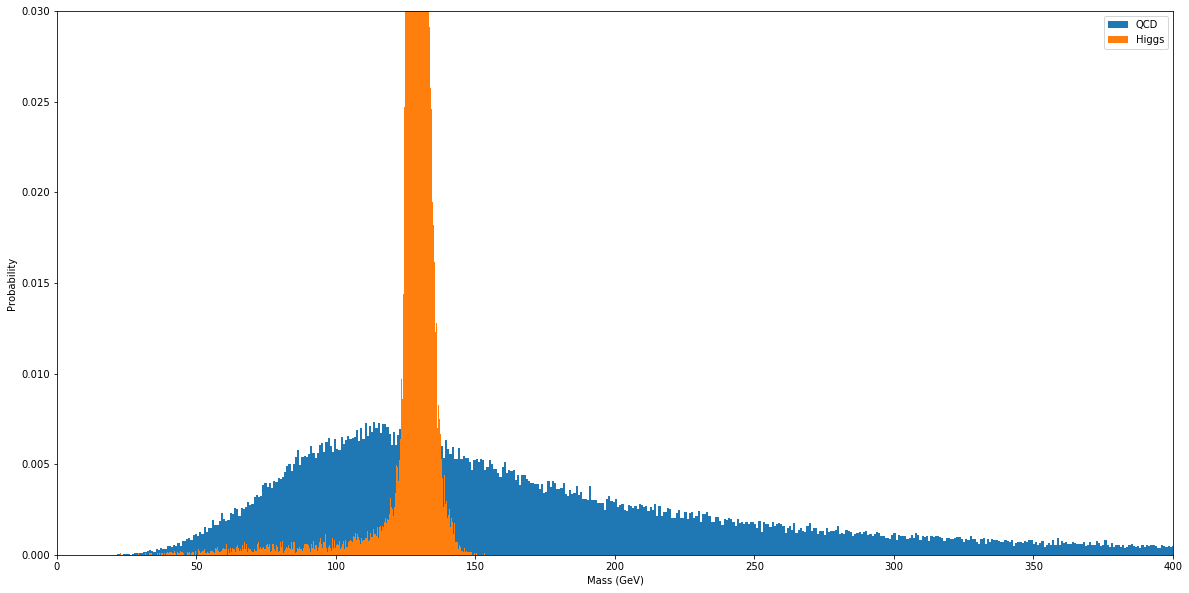

In [25]:
qcd_hist = plt.hist(qcd_d.mass, density=True, bins=1000, label='QCD')
higgs_hist = plt.hist(higgs_d.mass, density=True, bins=1000, label='Higgs')
plt.ylim(0,0.03)
plt.xlim(0,400)
plt.ylabel('Probability')
plt.xlabel('Mass (GeV)')
plt.legend()
plt.show()

The hisogram above compares the mass of a QCD jet (blue) and a Higgs jet (orange). By visual inspection, we can see that the histograms are very different, so mass would make for a good discriminatory feature. While Higgs particles may have a similar mass to QCD particles on average, Higgs particles have a much smaller standard deviation of mass, and appear to usually have a mass between 120 and 140 GeV.

We assume that the mass distribution for the QCD background and Higgs signal are both Poisson with expected yields of $N_{QCD} = 2000$ and $N_{Higgs} = 50$. Each distribution has $\lambda = N$, where N is its expected yield. The null hypothesis suggests that there is no Higgs particle, so the expected background would be $N_{QCD}$. What is the significance of having recorded $N_{QCD}+N_{Higgs}$ particles?

In [30]:
evh = 50
evq = 2000
evtot = evq + evh
theoreticalsig = stats.norm.isf(stats.poisson.sf(evtot,evq))
print('Significance: ', theoreticalsig)

Significance:  1.1282230087754423


For a poisson distribution with large $\lambda$ we can approximate with a gaussian distribituted variable with mean $\lambda$ and standard deviation $\sqrt{\lambda}$

$$S = \Phi^{-1}(1-p)$$
The p-value of the background only given an event $x$ is
$$p = 1 - \Phi({\frac{x-\mu}{\sigma}})$$
Where $\mu = \lambda_{QCD}$ and $\sigma = \sqrt{\lambda_{QCD}}$,
$$p = 1 - \Phi({\frac{x-\lambda_{QCD}}{\sqrt{\lambda_{QCD}}}})$$
Setting up for our equation for significance,
$$1-p = \Phi({\frac{x-\lambda_{QCD}}{\sqrt{\lambda_{QCD}}}})$$
$$\Phi^{-1}(1-p) = \frac{x-\lambda_{QCD}}{\sqrt{\lambda_{QCD}}}$$
Finally our value for significance,
$$S_x = \frac{x-\lambda_{QCD}}{\sqrt{\lambda_{QCD}}}$$
The average of X is $\lambda_{QCD}+\lambda_{Higgs}$
$$S_{avg} = \frac{\lambda_{Higgs}}{\sqrt{\lambda_{QCD}}}$$

By this formula, the average significance of the distribution X (the sum of the Higgs and QCD distributions) is $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$.

In [31]:
observed_sig = evh/math.sqrt(evq)
print("Significance: ", observed_sig)

Significance:  1.118033988749895


The difference between our significance calculation using Poisson statistics and the analytic formula we derived was almost negligible at ~0.01 sigma.  


### Part 2: Optimize Event Selection
Now, using our analytic formula, we find subsets of the data with the highest expected significance. First we visualize the data with a scatter plot,